<h1 align="center"> Análisis de Emociones en Noticias <h1>

In [1]:
%matplotlib notebook
%config InlineBackend.close_figures = False
import main
import ipywidgets as widgets
from ipywidgets import *
from IPython.display import display
from IPython.display import clear_output
from IPython.display import Javascript
import matplotlib.pyplot as plt


<h2 align="center"> Selección de términos <h2>

In [2]:
text = widgets.Text(placeholder="Insert the CED words separated by commas")
display(text)
def handle_submit(sender):
    clear_output()
    newced = main.parseinput(text.value)
    main.setcedwords(newced)
    print ("the new CED is: "+ str(newced))
    display(Javascript('IPython.notebook.execute_cells_below()'))

text.on_submit(handle_submit)

<h2 align="center"> Gráfico de Emociones de Terminos <h2>

In [3]:
d = 0
e = 0

def f(Delta):
    global d
    d = Delta
interact(f,Delta = (0,1,0.001))
def g(Epsilon):
    global e
    e =Epsilon
interact(g,Epsilon = (0,1,0.001))



button = widgets.Button(description = "DRAW!")
display(button)

def on_button_clicked(b):
    global d
    global e
    main.EmotionAnalysis(d,e)

button.on_click(on_button_clicked)

<h2 align="center"> Gráfico de Relaciones entre Terminos <h2>

<IPython.core.display.Javascript object>


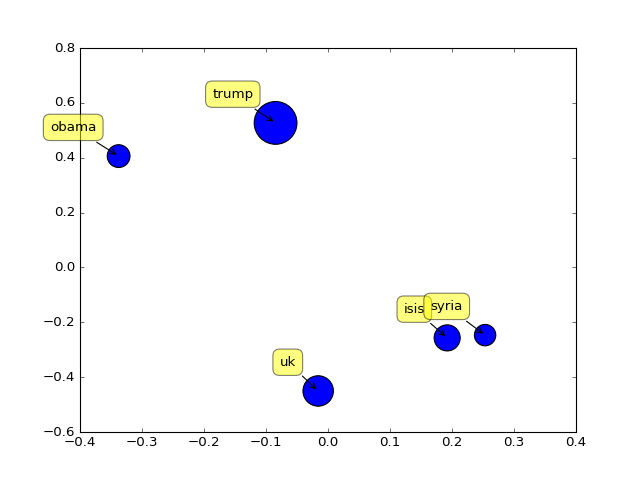

In [4]:
def dayrel(day):
    global relfig
    main.RelationDay(day,relfig)
relfig = plt.figure("Relations")

In [5]:
interact(dayrel,day=(0,len(main.relationsmatrixes)-1,1))

In [6]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read() #or edit path to custom.css
    return HTML(styles)
css_styling()